In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

# First param is project name, second is config name
LOCATION = "..\\out\\%s\\%s.csv"
# Params are project, datapoint, concepts
DATAPOINT = "..\\data\\corpora_clean\\%s\\%s\\%d\\merged.dot"
sns.set_style("whitegrid")
figsize=(5,4)
dpi=300
palette="dark"

In [2]:
projects = [
    "Commandline",
    "CommonMark",
    "Hangfire",
    "Humanizer",
    "Lean",
    "Nancy",
    "Newtonsoft.Json",
    "Ninject",
    "RestSharp",
]

In [3]:
import itertools
l = [False, True]
configs = list(itertools.product(l, repeat=3))[1:]
df = pd.DataFrame(data=[], columns=['Datapoint','Concepts','Accuracy','Overlap','Time'])
for project in tqdm(projects):
    for with_data, with_call, with_name in tqdm(configs, leave=False):
        suffix = ""
        edges_kept = ""
        if with_data:
            suffix += "d"
            edges_kept += "data"
        if with_call:
            suffix += "c"
            edges_kept += "control"
        if with_name:
            suffix += "n"
            edges_kept += "name"
    
        try:
            location = LOCATION % (project, ("wl_%s_1_results_%s" % (edges_kept, suffix)))
            temp_df = pd.read_csv(location, index_col=False)
            temp_df['Project'] = pd.Series([project]*len(temp_df.index))
            temp_df['Method'] = pd.Series(["WL %s" % suffix]*len(temp_df.index))
            
            df = df.append(temp_df, sort=False)
        except FileNotFoundError:
            pass # If it's not there, it's not there yet :)
df

,Datapoint,Concepts,Accuracy,Overlap,Time,Project,Method
0,d5ec8fe917400b61d0fc2b395a5b09cacb07b638_4bdd7...,1,1.000000,NaN,0.323247,CommonMark,WL n
1,e77bf5a9c6f6a432fa0fb845ccdb64d9b2427bbb_18d1c...,1,1.000000,NaN,3.269842,CommonMark,WL n
2,1170c02258267f1462fc3f82fca5a4588ef0de94_57dc0...,1,0.979310,0.958621,30.746534,CommonMark,WL n
3,d1090abfb4fc5d321057eaef1b8f5be1b69a6d72_7eb2a...,1,0.927928,0.891892,18.077365,CommonMark,WL n
4,6477195d66ef7b6a9f0388f01d0479a671328594_11b77...,1,1.000000,NaN,0.423968,CommonMark,WL n
...,...,...,...,...,...,...,...
582,4a791910b92255cc24f68459d164f9a6f46db582_c3cbb...,1,1.000000,NaN,0.751019,Humanizer,WL dcn
583,df2ac8c12cbcf10b5450f3dbe11002dd45fc4c19_1f601...,1,1.000000,NaN,0.357750,Humanizer,WL dcn
584,d4594fa17302e0dbf019dca7903b61b822a57813_c2cc4...,1,0.857143,0.821429,3.956845,Humanizer,WL dcn
585,36a142d7f2b1bb20b25d962373c3206c0a2421bc_d95d3...,1,1.000000,NaN,0.215314,Humanizer,WL dcn


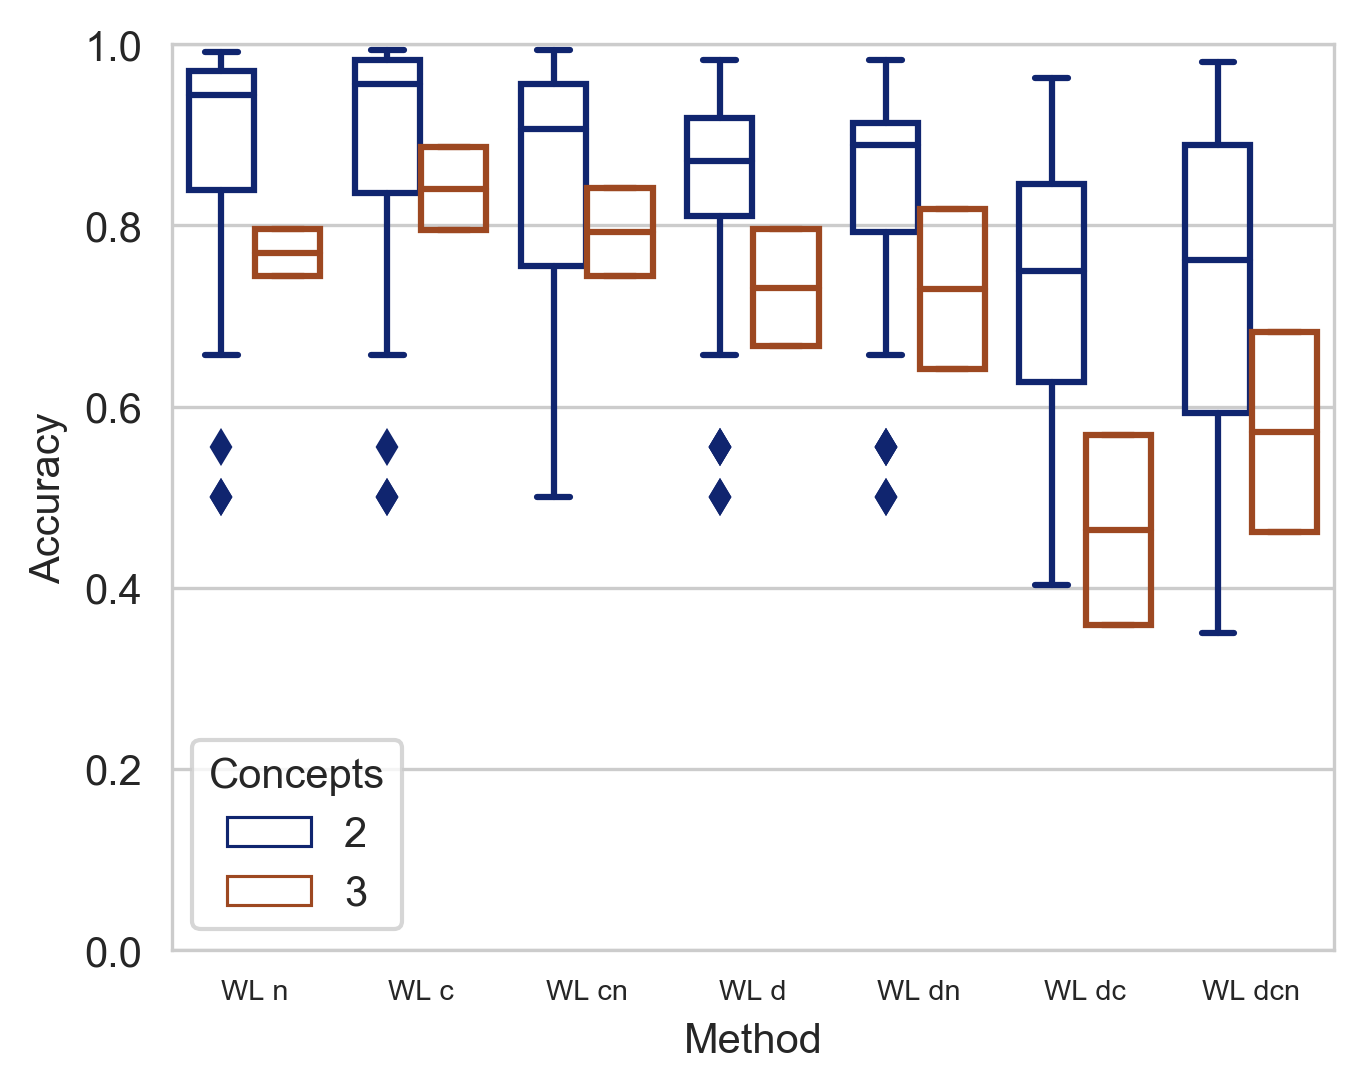

In [4]:
fig = plt.figure(figsize=figsize, dpi=dpi)
ax = fig.gca()
sns.boxplot(data=df[df.Concepts > 1], x="Method", y="Accuracy", hue="Concepts", palette=palette, ax=ax)
# sns.swarmplot(data=df[df.Concepts > 1], x="Method", y="Accuracy", palette=palette, alpha=.66, ax=ax)

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
#     col = color_map[i]
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')
        
plt.xticks(
#     rotation=10,
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-small',
)

plt.ylim((-0.0,1.0))
    
plt.savefig("Accuracy_ablation.pdf", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
           )

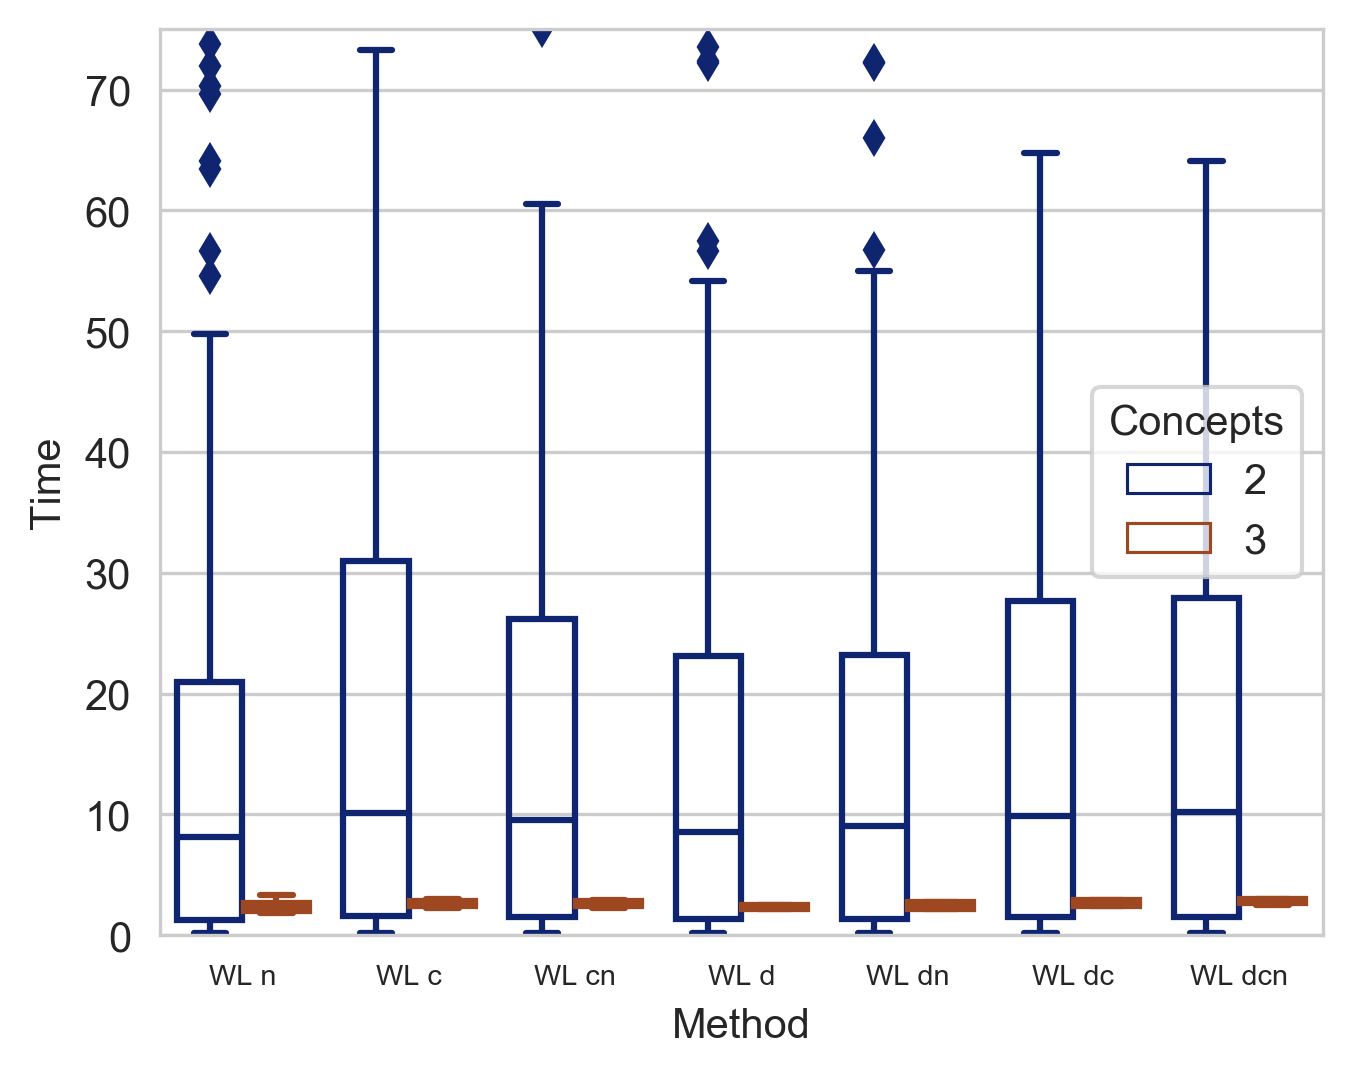

In [5]:
fig = plt.figure(figsize=figsize, dpi=dpi)
ax = fig.gca()
sns.boxplot(data=df[df.Concepts > 1], x="Method", y="Time", hue="Concepts", palette=palette, ax=ax)
# sns.swarmplot(data=df[df.Concepts > 1], x="Method", y="Accuracy", palette=palette, alpha=.66, ax=ax)

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
#     col = color_map[i]
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')
        
plt.xticks(
#     rotation=10,
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-small',
)

plt.ylim((0, 75))

plt.savefig("Time_ablation.pdf", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
           )